In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [51]:
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
import pandas as pd
import numpy as np

In [52]:
dir="../input"
os.chdir(dir)

In [53]:
train_x=pd.read_csv("fashion_train.csv",header=0)
train_y=pd.read_csv("fashion_train_labels.csv",header=0)
test_x=pd.read_csv("fashion_test.csv",header=0)
test_y=pd.read_csv("fashion_test_labels.csv",header=0)

In [54]:
labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
train_x=train_x/255
train_y=train_y/255
test_x=test_x/255
test_y=test_y/255

In [55]:
print(train_x.shape)

(60000, 784)


In [56]:
print(train_y.shape)

(60000, 1)


In [57]:
print(test_x.shape)

(10000, 784)


In [58]:
print(test_y.shape)

(10000, 1)


In [59]:
print(train_x.head())

     0    1    2    3    4         5 ...   778  779  780  781  782  783
0  0.0  0.0  0.0  0.0  0.0  0.000000 ...   0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.003922 ...   0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.000000 ...   0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.000000 ...   0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.000000 ...   0.0  0.0  0.0  0.0  0.0  0.0

[5 rows x 784 columns]


In [60]:
print(test_x.head())

     0    1    2         3    4 ...        779       780  781  782  783
0  0.0  0.0  0.0  0.000000  0.0 ...   0.000000  0.000000  0.0  0.0  0.0
1  0.0  0.0  0.0  0.000000  0.0 ...   0.741176  0.262745  0.0  0.0  0.0
2  0.0  0.0  0.0  0.000000  0.0 ...   0.000000  0.000000  0.0  0.0  0.0
3  0.0  0.0  0.0  0.000000  0.0 ...   0.000000  0.000000  0.0  0.0  0.0
4  0.0  0.0  0.0  0.007843  0.0 ...   0.000000  0.000000  0.0  0.0  0.0

[5 rows x 784 columns]


In [61]:
import matplotlib.pyplot as plt

In [62]:
%matplotlib inline

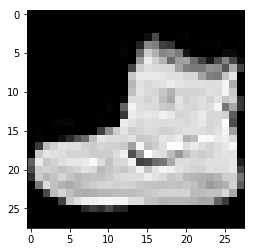

In [63]:
plt.imshow(np.array(train_x.iloc[0]).reshape((28,28)),cmap='gray')

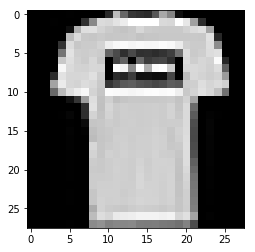

In [64]:
plt.imshow(np.array(train_x.iloc[1]).reshape((28,28)),cmap='gray')

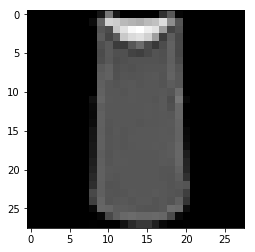

In [65]:
plt.imshow(np.array(train_x.iloc[2]).reshape((28,28)),cmap='gray')

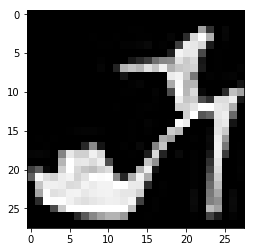

In [66]:
plt.imshow(np.array(train_x.iloc[9]).reshape((28,28)),cmap='gray')

In [67]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1,l2

In [68]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30,input_dim=784,kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dense(units=1000,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=1000,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=500,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=200,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
])

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              31000     
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_9 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_10 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2010      
Total params: 1,658,260
Trainable params: 1,658,260
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [71]:
m=model.fit(train_x,train_y,epochs=10,validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 25s 512us/sample - loss: 0.0808 - acc: 0.9989 - val_loss: 0.0557 - val_acc: 1.0000
Epoch 2/10
48000/48000 [==============================] - 24s 498us/sample - loss: 0.0540 - acc: 1.0000 - val_loss: 0.0523 - val_acc: 1.0000
Epoch 3/10
48000/48000 [==============================] - 24s 509us/sample - loss: 0.0507 - acc: 1.0000 - val_loss: 0.0492 - val_acc: 1.0000
Epoch 4/10
48000/48000 [==============================] - 23s 486us/sample - loss: 0.0478 - acc: 1.0000 - val_loss: 0.0463 - val_acc: 1.0000
Epoch 5/10
48000/48000 [==============================] - 24s 491us/sample - loss: 0.0450 - acc: 1.0000 - val_loss: 0.0436 - val_acc: 1.0000
Epoch 6/10
48000/48000 [==============================] - 24s 493us/sample - loss: 0.0424 - acc: 1.0000 - val_loss: 0.0411 - val_acc: 1.0000
Epoch 7/10
48000/48000 [==============================] - 24s 504us/sample - loss: 0.0399 - acc: 1.0000 

In [72]:
test_loss,test_acc=model.evaluate(test_x,test_y)
print("Test Accuracy:",(test_acc*100))

10000/10000 [==============================] - 1s 104us/sample - loss: 0.0324 - acc: 1.0000
Test Accuracy: 100.0


In [73]:
p=model.predict(np.array(test_x.loc[0]).reshape(1,784))
p

array([[1.0000000e+00, 2.3939097e-09, 1.4164170e-09, 7.1893286e-10,
        3.3850904e-09, 8.4328128e-10, 9.7396002e-10, 3.7977996e-10,
        2.6448024e-09, 9.4421937e-10]], dtype=float32)

In [74]:
np.argmax(p)

0

In [ ]:
labels[0]

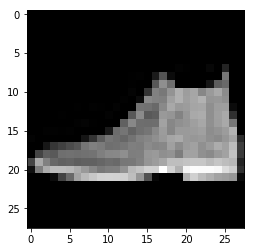

In [75]:
plt.imshow(np.array(test_x.loc[0]).reshape((28,28)),cmap='gray')

In [76]:
predict=model.predict(test_x)
predict[1]

array([1.0000000e+00, 4.5984185e-20, 1.2062688e-20, 2.3905007e-21,
       7.8421013e-20, 3.9740148e-21, 5.0336004e-21, 6.6524527e-22,
       5.0173464e-20, 5.2921190e-21], dtype=float32)

In [77]:
labels[9]

'Ankle boot'

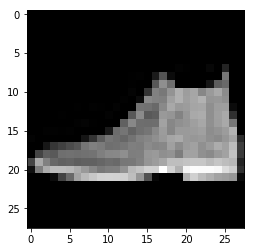

In [78]:
plt.imshow(np.array(test_x.loc[0]).reshape((28,28)),cmap='gray')

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "upper_left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


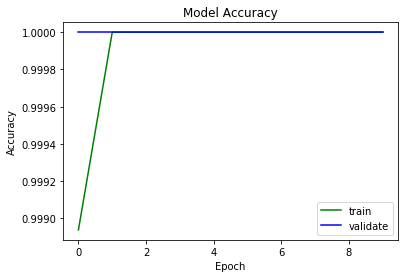

In [90]:
plt.plot(m.history['acc'],color='green')
plt.plot(m.history['val_acc'],color='blue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper_left')
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "upper_left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


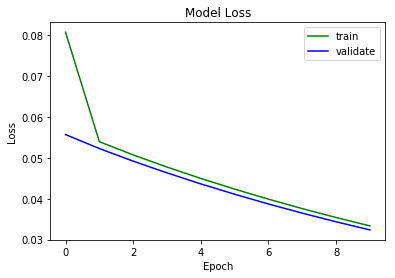

In [91]:
plt.plot(m.history['loss'],color='green')
plt.plot(m.history['val_loss'],color='blue')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper_left')
plt.show()

In [92]:
models=Sequential()
models.add(Dense(units=30,input_dim=784,kernel_regularizer=l2(0.001)))
models.add(Activation('relu'))
models.add(Dense(units=1000))
models.add(Activation('relu'))
models.add(Dense(units=1000))
models.add(Activation('relu'))
models.add(Dense(units=500))
models.add(Activation('relu'))
models.add(Dense(units=200))
models.add(Activation('relu'))
models.add(Dense(units=10))
models.add(Activation('softmax'))

In [93]:
models.summary()
models.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 30)                23550     
_________________________________________________________________
activation_13 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1000)              31000     
_________________________________________________________________
activation_14 (Activation)   (None, 1000)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
activation_15 (Activation)   (None, 1000)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 500)               500500    
__________

In [94]:
x=np.array(train_x)
import keras
y=keras.utils.to_categorical(np.array(train_y),10)
m2=models.fit(x,y,epochs=10,validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 21s 437us/step - loss: 0.0781 - acc: 0.9991 - val_loss: 0.0553 - val_acc: 1.0000
Epoch 2/10
48000/48000 [==============================] - 21s 443us/step - loss: 0.0536 - acc: 1.0000 - val_loss: 0.0519 - val_acc: 1.0000
Epoch 3/10
48000/48000 [==============================] - 21s 441us/step - loss: 0.0503 - acc: 1.0000 - val_loss: 0.0488 - val_acc: 1.0000
Epoch 4/10
48000/48000 [==============================] - 21s 427us/step - loss: 0.0474 - acc: 1.0000 - val_loss: 0.0460 - val_acc: 1.0000
Epoch 5/10
48000/48000 [==============================] - 21s 432us/step - loss: 0.0446 - acc: 1.0000 - val_loss: 0.0433 - val_acc: 1.0000
Epoch 6/10
48000/48000 [==============================] - 21s 440us/step - loss: 0.0420 - acc: 1.0000 - val_loss: 0.0408 - val_acc: 1.0000
Epoch 7/10
48000/48000 [==============================] - 21s 445us/step - loss: 0.0396 - acc: 1.0000 - val_loss: 0.

In [95]:
p2=models.predict(np.array(test_x.loc[0]).reshape(1,784))
p2

array([[1.0000000e+00, 2.7669596e-09, 8.0928830e-10, 2.5629758e-09,
        5.0267107e-10, 4.2973600e-10, 1.6823953e-10, 4.1390652e-10,
        4.5859860e-10, 9.3052083e-10]], dtype=float32)

In [96]:
labels[9]

'Ankle boot'

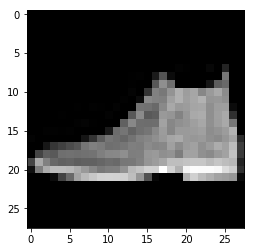

In [97]:
plt.imshow(np.array(test_x.loc[0]).reshape((28,28)),cmap='gray')

In [98]:
np.argmax(p2)


0

In [99]:
labels[0]

'T-shirt/top'

In [100]:
p3=models.predict_proba(np.array(test_x.loc[8]).reshape(1,784))

In [101]:
np.argmax(p3)

0

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "upper_left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


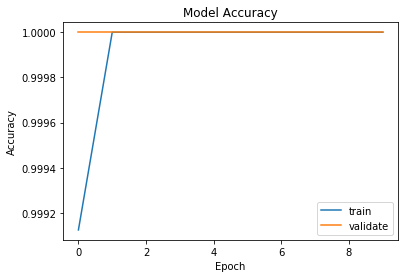

In [103]:
plt.plot(m2.history['acc'])
plt.plot(m2.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper_left')
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "upper_left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


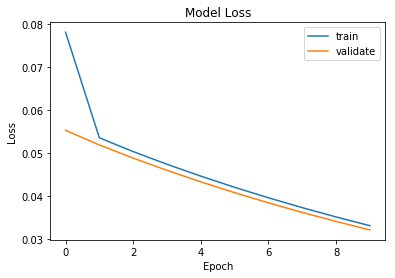

In [109]:
plt.plot(m2.history['loss'])
plt.plot(m2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper_left')
plt.show()